In [13]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

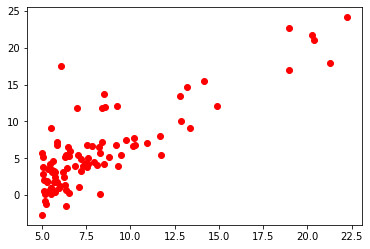

In [14]:
with open('data2.txt') as f:
    x, y = [], [] 
    for line in f:
        elements_list = line.split(',')       
        x.append(float(elements_list[0]))
        y.append(float((elements_list[1].splitlines())[0]))

plt.scatter(x, y, c='r')

# use Python to implement the following methods to find the coefficients:
# 2) Normal equation, and

Coefficients are: [-3.92163112  1.18429311]


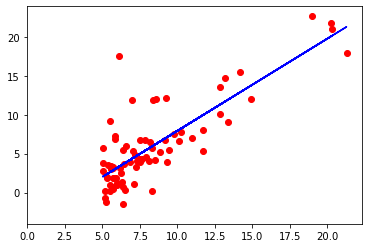

In [15]:
from sklearn.model_selection import train_test_split
x_np = np.array(x)
#Split dataset into 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_np = np.c_[np.ones(len(x_train)), x_train] 
xtx = np.dot(np.transpose(x_np), x_np)
theta = np.dot(np.linalg.pinv(xtx), np.dot(np.transpose(x_np), y_train))
print ('Coefficients are:', theta)

y_predicted = (theta[1]*x_np) + theta[0]
plt.scatter(x_train, y_train, c='r')
plt.plot(x_np, y_predicted, c='b')
plt.show()

# 3) Gradient Descent using batch AND stochastic modes respectively:

a) Split dataset into 80% for training and 20% for testing.

b) Plot MSE vs. iteration of each mode for both training set and testing set; compare
batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)

c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.


In [16]:
#Split dataset into 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [17]:
def linear_regression_batch (file_x, file_y, params, alpha, max_iter, test = 0, lr_plot_call = 0):
    # To compute params for linear regression considering the whole batch
    iteration = 0
    num_samples = len(file_x)
    batch_cost = []

    while iteration < max_iter:

        y_pred_list = []
        for x, y in zip(file_x, file_y):
            hypothesis = np.dot(params, np.array([1.0, x]))
            y_pred_list.append(hypothesis)
            gradient = np.array([1.0, x]) * (y - hypothesis)  # np.array([1.0, x]) = X'
            params += alpha * gradient/num_samples   # parameters updated!
            cost = (np.sum((y-hypothesis)**2 )/ (2 * num_samples))
            batch_cost.append(cost)
            if math.fabs(params[0]) < 0.0001 and math.fabs(params[1]) < 0.0001:
                break          
        iteration += 1
    
    line = np.dot(params[1], file_x) + params[0]
    
    if not lr_plot_call:
        # if not test:
        plt.plot(file_x, line, c='r', label ="Training data Batch GD")
        plt.scatter(file_x, file_y, c='b')       
        # else:
        #     test_ data plot
    print(params, "BATCH", type(params))        
    return params, batch_cost

[-3.61126848  1.13129438] BATCH <class 'numpy.ndarray'>


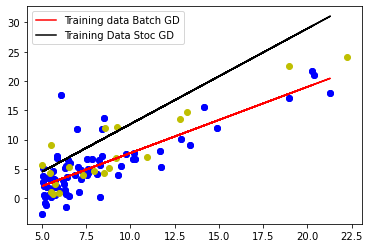

[-3.69209777  1.63321798] <class 'numpy.ndarray'>


In [18]:
def linear_regression_stochastic(x_1, y_1, learning_rate, epoch, test = 0, lr_plot_call = 0):
    # y = w1*x + w0
    N = len(x_1)
    w1_new, w0_new = np.random.rand(1), np.random.rand(1)   # initialization
    # params = [0, 0]
    cost_stoc = []
    
    for i in range(epoch):
        index = np.random.randint(N)
        x = x_1[index:index+1]
        y = y_1[index:index+1]
        y_new = np.dot(w1_new, x) + w0_new    # y_predicted = (w1_new * x) + w0_new
        cost = ((y-y_new)**2 )/2
        cost_stoc.append(cost)
        w1_gradient = -(1)*np.dot(x,(y-y_new))
        w0_gradient = -(1)*(y-y_new )    # d/dx(MSE) = -2/N*sum(y-(w1x+w0)); therefore for RMSE gradient = -1/N*sum(y-y')
        w0_new = w0_new - (learning_rate * w0_gradient)
        w1_new = w1_new - (learning_rate * w1_gradient)


        if math.fabs(w0_gradient) < 0.0001 and math.fabs(w1_gradient) < 0.0001:
            # condition for termination - due to insignificant change in gradient
            break
    
    params = np.concatenate((w0_new, w1_new),axis=0)

    if not lr_plot_call:
        # if not test:    
        plt.scatter(x_1, y_1, c='b')
        line = w1_new*x_1 + w0_new
        plt.plot(x_1, line, c='k', label = 'Training Data Stoc GD')    
        plt.scatter(x_test, y_test, c='y')
        plt.legend()
        plt.show()
        # else:
        #     test_ data plot
    print(params, type(params))    
    return params, cost_stoc

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

params_0 = np.array([2.0, 16.0])

alpha_batch = 1e-2
learning_rate = 0.01
max_iter = 5000

params_batch, cost_batch=\
    linear_regression_batch(x_train, y_train, params_0, alpha_batch, max_iter)
    
params_stoc, cost_stoc =\
    linear_regression_stochastic(x_train, y_train, learning_rate, max_iter)



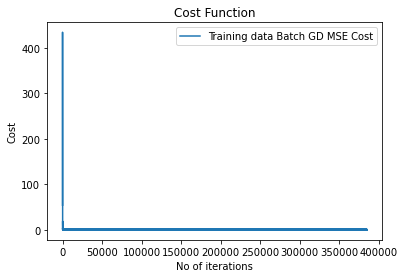

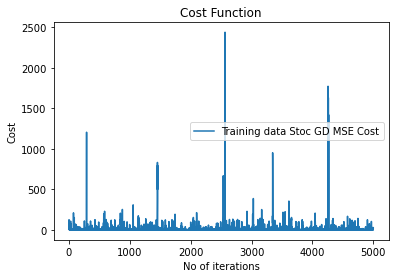

In [19]:
plt.title('Cost Function')
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(cost_batch, label = "Training data Batch GD MSE Cost")
plt.legend()
plt.show()

plt.title('Cost Function')
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(cost_stoc, label = "Training data Stoc GD MSE Cost")
plt.legend()
plt.show()

In comparison to Normal Equation, Batch Mode gives the most accurate output than Stotastic and also converges faster. Although, Stotastic is less likely to have local minima and will take less amount of time to get the output



# c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

[-3.8904481   1.18124084] BATCH <class 'numpy.ndarray'>
[-3.88896625  1.18100602] BATCH <class 'numpy.ndarray'>
[-3.88746137  1.18077312] BATCH <class 'numpy.ndarray'>
[-3.88593312  1.18054199] BATCH <class 'numpy.ndarray'>
[-3.88438116  1.18031243] BATCH <class 'numpy.ndarray'>
[-3.88280516  1.18008428] BATCH <class 'numpy.ndarray'>
[-3.88120474  1.17985734] BATCH <class 'numpy.ndarray'>
[-3.87957956  1.1796314 ] BATCH <class 'numpy.ndarray'>
[-3.87792922  1.17940628] BATCH <class 'numpy.ndarray'>
[-3.87625334  1.17918174] BATCH <class 'numpy.ndarray'>
[-3.87455153  1.17895757] BATCH <class 'numpy.ndarray'>
[-3.87282337  1.17873353] BATCH <class 'numpy.ndarray'>
[-3.87106844  1.17850939] BATCH <class 'numpy.ndarray'>
[-3.86928632  1.1782849 ] BATCH <class 'numpy.ndarray'>
[-3.86747656  1.1780598 ] BATCH <class 'numpy.ndarray'>
[-3.86563871  1.17783383] BATCH <class 'numpy.ndarray'>
[-3.86377231  1.1776067 ] BATCH <class 'numpy.ndarray'>
[-3.86187688  1.17737814] BATCH <class 'numpy.nd

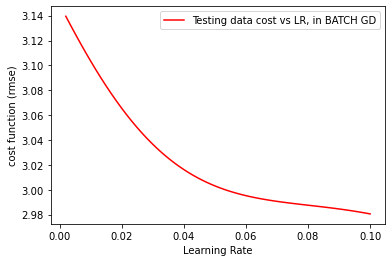

In [22]:
learning_rates, learning_rates_stoc = [], []
rmse_batch_list, rmse_stoch_list = [], []
for learning_rate in np.arange(0.1,0.001,-0.001):
    learning_rates.append(learning_rate)
   
    params_batch, cost_batch=\
    linear_regression_batch(x_train, y_train, params_0, learning_rate, max_iter, lr_plot_call = 1)
    y_predicted = params_batch[0] + np.dot(params_batch[1], x_test)    
    rmse_batch = math.sqrt(mean_squared_error(y_test, y_predicted))
    rmse_batch_list.append(rmse_batch)
    
    
plt.plot(learning_rates,  rmse_batch_list, c='r', label = "Testing data cost vs LR, in BATCH GD")
plt.xlabel('Learning Rate')
plt.ylabel('cost function (rmse)')
plt.legend()
plt.show()

As seen above to minimize the cost function the value with the lowest learning rate (which varies from 0.02 to 0.03) is taken for both the models